In [343]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
g = nx.Graph()

In [345]:
# read in csv & display first 5 rows
kdramaData = pd.read_csv("kdramas_dataset.csv")
kdramaData.head()

,Rank,Title,Year of release,Number of Episodes,Rating,Description,Genre,Tags,Actors
0,#1,Move to Heaven,2021,10,9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...","Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju..."
1,#2,Twinkling Watermelon,2023,16,9.2,"In 2023, high school student Eun Gyeol, a CODA...","Romance, Youth, Drama, Fantasy","Time Travel, Child From The Future, Sign Langu...","Ha Eun-Gyeol, Ha Yi-Chan, Choi Se-Kyung, Yoon ..."
2,#3,Moving,2023,20,9.1,"Kim Bong Seok, Jang Hui Su, and Lee Gang Hun, ...","Action, Thriller, Mystery, Supernatural","Graphic Violence, Supernatural Power, Multiple...","Ryu Seung Ryong, Han Hyo Joo, Zo In Sung"
3,#4,The Trauma Code: Heroes on Call,2025,8,9.1,"Baek Gang Hyeok, a genius trauma surgeon with ...","Action, Comedy, Drama, Medical","Surgeon Male Lead, Hospital Setting, Mentor-Me...","Ju Ji Hoon, Choo Young Woo, Ha Young, Yoon Gyu..."
4,#5,Flower of Evil,2020,16,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ..."


In [347]:
# display data info
kdramaData.info()
# seems to have no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                350 non-null    object 
 1   Title               350 non-null    object 
 2   Year of release     350 non-null    int64  
 3   Number of Episodes  350 non-null    int64  
 4   Rating              350 non-null    float64
 5   Description         350 non-null    object 
 6   Genre               350 non-null    object 
 7   Tags                350 non-null    object 
 8   Actors              350 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 24.7+ KB


In [349]:
# General Statistical Overview
# rounded to the nearest tenth
kdramaData.describe().drop(index='count').round(1)

,Year of release,Number of Episodes,Rating
mean,2019.8,18.3,8.4
std,3.7,14.6,0.5
min,2003.0,1.0,6.4
25%,2018.0,12.0,8.3
50%,2020.0,16.0,8.4
75%,2023.0,16.0,8.6
max,2025.0,133.0,9.2


In [351]:
# clean and split actors
kdramaData["Actors"] = kdramaData["Actors"].fillna("").apply(lambda x: [a.strip() for a in x.split(",") if a.strip()])

In [353]:
# create graph
for _, row in kdramaData.iterrows():
    actors = row["Actors"]
    for actor in actors:
        g.add_node(actor, label=actor)
    for a1, a2 in combinations(actors, 2):
        if g.has_edge(a1, a2):
            g[a1][a2]["weight"] += 1
        else:
            g.add_edge(a1, a2, weight=1)

In [355]:
# graph summary
print("Nodes (actors):", len(g.nodes))
print("Edges (shared dramas):", len(g.edges))

Nodes (actors): 950
Edges (shared dramas): 4299


In [357]:
# Centrality calculations
# calls imported network library
# takes graph as an input and calculates degree of centrality at each node

deg_cent = nx.degree_centrality(g)
btw_cent = nx.betweenness_centrality(g)
eig_cent = nx.eigenvector_centrality(g, max_iter=1000)

In [359]:
# top 10 actors by Degree Centrality
print("\nTop 10 Actors by Degree Centrality:\n")
top_deg = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:10]
for i, (actor, score) in enumerate(top_deg, 1):
    print(f"{i}. {actor} - {score:.4f}")


Top 10 Actors by Degree Centrality:

1. Shin Hye Sun - 0.0400
2. Lee Joon Hyuk - 0.0400
3. Ahn Bo Hyun - 0.0400
4. Park Min Young - 0.0348
5. Jung So Min - 0.0316
6. Lee Dong Wook - 0.0316
7. Lee Jong Suk - 0.0316
8. Yoon Gyung Ho - 0.0306
9. Lee Se Young - 0.0306
10. Uhm Ki Joon - 0.0306


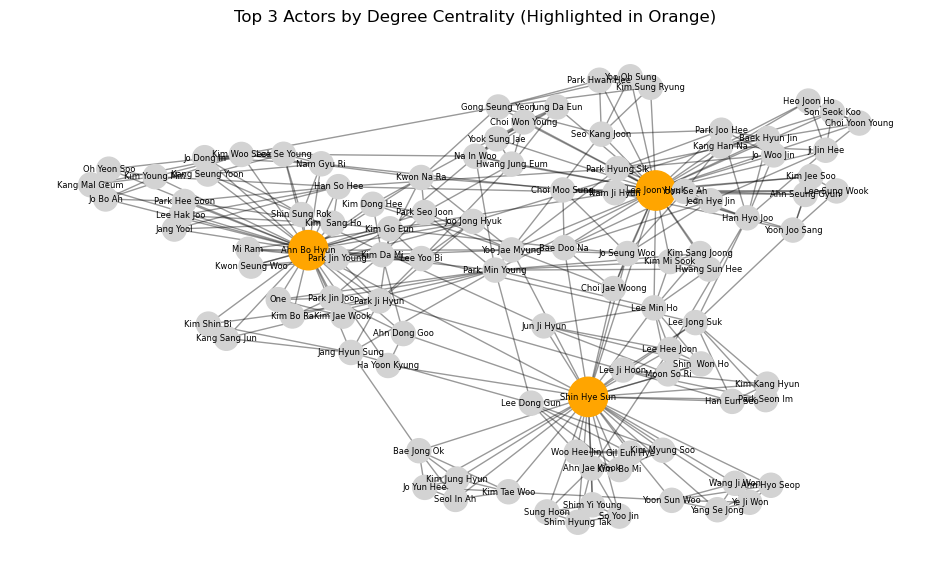

In [361]:
# Plot Top 3 Actors by Degree Centrality
# get top 3 actors
top_3 = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)
top_actors = [actor for actor, _ in top_3 if actor in g.nodes][:3]

# neighbors
subgraph_nodes = set(top_actors)
for actor in top_actors:
    subgraph_nodes.update(g.neighbors(actor))

# subgraph
top_subgraph = g.subgraph(subgraph_nodes)

# visual details
node_colors = []
node_sizes = []
for node in top_subgraph.nodes:
    # top 3 in orange
    if node in top_actors:
        node_colors.append("orange")
        node_sizes.append(800)
    else:
        node_colors.append("lightgray")
        node_sizes.append(300)

# plot
plt.figure(figsize=(12, 7))
pos = nx.spring_layout(top_subgraph, seed=42)
nx.draw_networkx_nodes(top_subgraph, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(top_subgraph, pos, alpha=0.4)
nx.draw_networkx_labels(top_subgraph, pos, font_size=6)
plt.title("Top 3 Actors by Degree Centrality (Highlighted in Orange)")
plt.axis("off")
plt.show()

In [363]:
# top 10 actors by Betweenness Centrality
print("\nTop 10 Actors by Betweenness Centrality:\n")
top_btw = sorted(btw_cent.items(), key=lambda x: x[1], reverse=True)[:10]
for i, (actor, score) in enumerate(top_btw, 1):
    print(f"{i}. {actor} - {score:.4f}")


Top 10 Actors by Betweenness Centrality:

1. Ahn Bo Hyun - 0.0349
2. Shin Hye Sun - 0.0327
3. Park Min Young - 0.0315
4. Lee Joon Hyuk - 0.0299
5. Lee Se Young - 0.0250
6. Lee Dong Wook - 0.0247
7. Yoon Gyung Ho - 0.0221
8. Jung So Min - 0.0219
9. Lee Jong Suk - 0.0207
10. Uhm Ki Joon - 0.0206


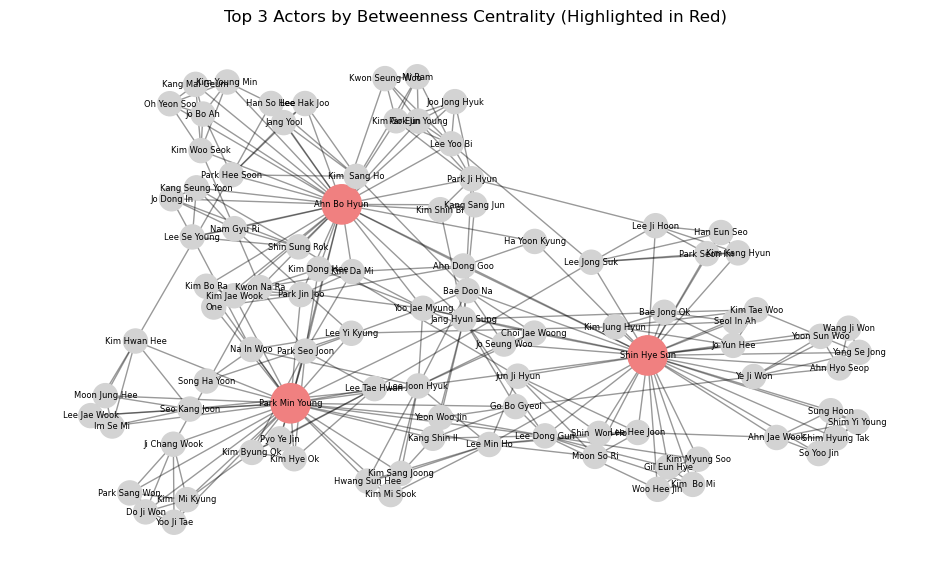

In [365]:
# Plot Top 3 Actors by Betweenness Centrality
# get top 3 actors
top_3_bet = sorted(btw_cent.items(), key=lambda x: x[1], reverse=True)
top_actors_bet = [actor for actor, _ in top_3_bet if actor in g.nodes][:3]

# neighbors
subgraph_nodes_bet = set(top_actors_bet)
for actor in top_actors_bet:
    subgraph_nodes_bet.update(g.neighbors(actor))

# subgraph
top_subgraph_bet = g.subgraph(subgraph_nodes_bet)

# visual details
node_colors_bet = []
node_sizes_bet = []
for node in top_subgraph_bet.nodes:
    # top 3 in coral
    if node in top_actors_bet:
        node_colors_bet.append("lightcoral")
        node_sizes_bet.append(800)
    else:
        node_colors_bet.append("lightgray")
        node_sizes_bet.append(300)

# plot
plt.figure(figsize=(12, 7))
pos = nx.spring_layout(top_subgraph_bet, seed=42)
nx.draw_networkx_nodes(top_subgraph_bet, pos, node_color=node_colors_bet, node_size=node_sizes_bet)
nx.draw_networkx_edges(top_subgraph_bet, pos, alpha=0.4)
nx.draw_networkx_labels(top_subgraph_bet, pos, font_size=6)
plt.title("Top 3 Actors by Betweenness Centrality (Highlighted in Red)", fontsize=12)
plt.axis("off")
plt.show()


In [367]:
# top 10 actors by Eigenvector Centrality
print("\nTop 10 Actors by Eigenvector Centrality:\n")
top_eig = sorted(eig_cent.items(), key=lambda x: x[1], reverse=True)[:10]
for i, (actor, score) in enumerate(top_eig, 1):
    print(f"{i}. {actor} - {score:.4f}")


Top 10 Actors by Eigenvector Centrality:

1. Lee Joon Hyuk - 0.1622
2. Ahn Bo Hyun - 0.1547
3. Shin Hye Sun - 0.1276
4. Park Min Young - 0.1243
5. Lee Se Young - 0.1146
6. Yoo Jae Myung - 0.1115
7. Namkoong Min - 0.1108
8. Lee Jun Ho - 0.1048
9. Yoon Gyung Ho - 0.1030
10. Lee Jong Suk - 0.1016


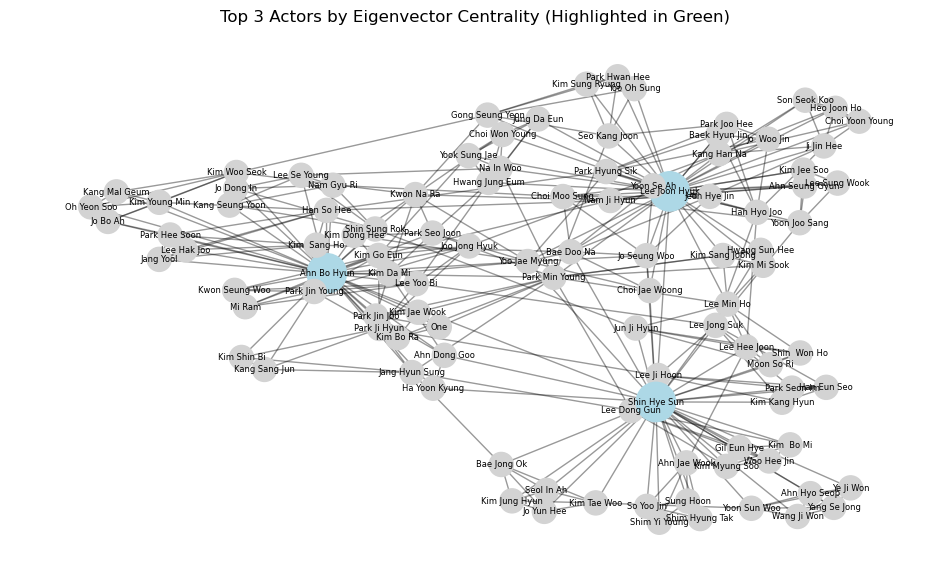

In [369]:
# Plot Top 3 Actors by Eigenvector Centrality
# get top 3 actors
top_3_eigen = sorted(eig_cent.items(), key=lambda x: x[1], reverse=True)
top_actors_eigen = [actor for actor, _ in top_3_eigen if actor in g.nodes][:3]

# neighbors
subgraph_nodes_eigen = set(top_actors_eigen)
for actor in top_actors_eigen:
    subgraph_nodes_eigen.update(g.neighbors(actor))

# subgraph
top_subgraph_eigen = g.subgraph(subgraph_nodes_eigen)

# visual details
node_colors_eigen = []
node_sizes_eigen = []
for node in top_subgraph_eigen.nodes:
    if node in top_actors_eigen:
        # top 3 in blue
        node_colors_eigen.append("lightblue")
        node_sizes_eigen.append(800)
    else:
        node_colors_eigen.append("lightgray")
        node_sizes_eigen.append(300)

# plot
plt.figure(figsize=(12, 7))
pos = nx.spring_layout(top_subgraph_eigen, seed=42)
nx.draw_networkx_nodes(top_subgraph_eigen, pos, node_color=node_colors_eigen, node_size=node_sizes_eigen)
nx.draw_networkx_edges(top_subgraph_eigen, pos, alpha=0.4)
nx.draw_networkx_labels(top_subgraph_eigen, pos, font_size=6)
plt.title("Top 3 Actors by Eigenvector Centrality (Highlighted in Green)", fontsize=12)
plt.axis("off")
plt.show()